In [ ]:
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

drive.mount('/content/gdrive')

train_path = os.listdir("/content/gdrive/My Drive/data/train_blur/")
label_path = os.listdir("/content/gdrive/My Drive/data/train_label/")
train_path.sort()
label_path.sort()

datas = os.listdir("/content/gdrive/My Drive/data/train_blur/"+train_path[0]+"/")
datas.sort()

train_data = []
train_label = []

for i in range(2):
  for j in range(len(datas)):
    train_im = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/train_blur/"+train_path[i]+"/"+datas[j]),cv2.COLOR_BGR2RGB)
    label_im = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/train_label/"+label_path[i]+"/"+datas[j]),cv2.COLOR_BGR2RGB)      # load train data & train labels + resize
    train_im = cv2.resize(train_im,(128,72))
    label_im = cv2.resize(label_im,(128,72))
    train_data.append(train_im)
    train_label.append(label_im)
  print("Train data loading ended")

train_data = np.array(train_data).astype(int)
train_label = np.array(train_label).astype(int)

print(len(train_data))
print(len(train_label))

val_data = []
val_label = []

for i in range(len(datas)):
  val_im = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/train_blur/003/"+datas[i]),cv2.COLOR_BGR2RGB)
  val_label_im = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/train_label/003/"+datas[i]),cv2.COLOR_BGR2RGB)                # load validation data & validation labels + resize
  val_im = cv2.resize(val_im,(128,72))
  val_label_im = cv2.resize(val_label_im,(128,72))
  val_data.append(val_im)
  val_label.append(val_label_im)

val_data = np.array(val_data).astype(int)
val_label = np.array(val_label).astype(int)

print(len(val_data))
print(len(val_label))


deblur_CNN_input = Input(shape=(72,128,3))

# Deblurring CNN model
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )
deblur_CNN.summary()


adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer=adam,
              loss='mean_squared_error',
              metrics=['accuracy'])
deblur_CNN.load_weights('/content/gdrive/My Drive/celebA_deblur_cnn_weights.h5')      # load pretrained weight

# fine-tuning

deblur_CNN.trainable = True
set_trainable = False

for layer in deblur_CNN.layers:
  if layer.name == 'conv2d_13' or 'conv2d_14' or 'conv2d_15':                       # fine tuning last three conv layers.
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

# train with our dataset
history = deblur_CNN.fit(train_data,
                    train_label,
                    epochs=5,
                    batch_size=50,
                    validation_data=(val_data,val_label))

test_data = []
for i in range(9):
  img = cv2.imread("/content/gdrive/My Drive/data/blur/"+str(i+1)+".png")           # load test data
  test_data.append(img)
test_data = np.array(test_data).astype(int)


# model perrformance evaluate
Deblurred = deblur_CNN.predict(test_data)

_,pos = plt.subplots(nrows=1, ncols=3, figsize=(15,15))                             # visualize output image with data
pos[0].imshow(test_data[3]/255)
pos[1].imshow(Deblurred[3]/255)
pos[2].imshow(train_label[3]/255)

plt.show()

print("Done")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Train data loading ended
Train data loading ended
200
200
100
100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 128, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 128, 128)      38528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 128, 128)      512       
_________________________________________________________________
activation_1 (Activation)    (None, 72, 128, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 128, 320)      41280     
____________________________________________________________

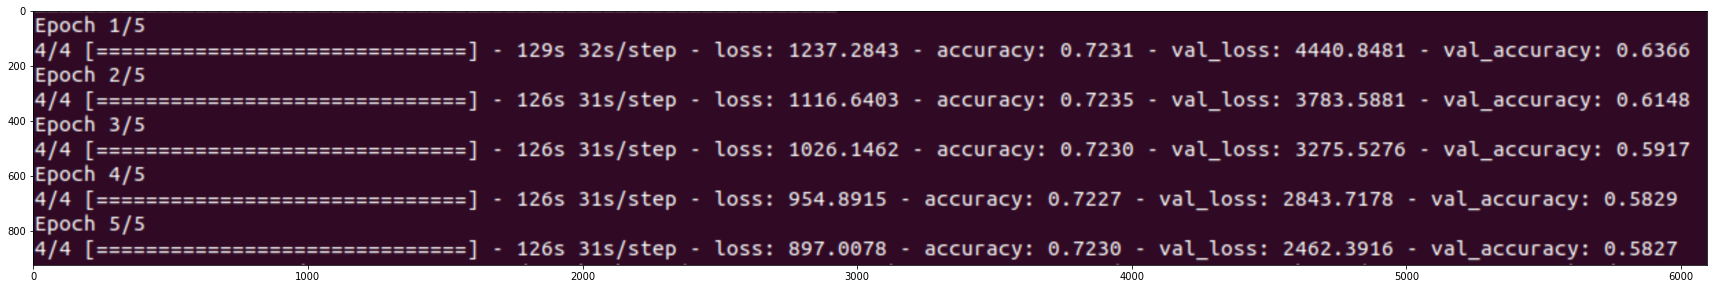

In [11]:
import matplotlib.pyplot as plt
import cv2

terminal = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/presentation/ter.png"),cv2.COLOR_BGR2RGB)
terminal = cv2.resize(terminal,(terminal.shape[1]*5,terminal.shape[0]*5))

_,pos = plt.subplots(nrows=1, ncols=1, figsize=(30,30))     # Visualize training process in ubuntu terminal
plt.imshow(terminal)
plt.show()

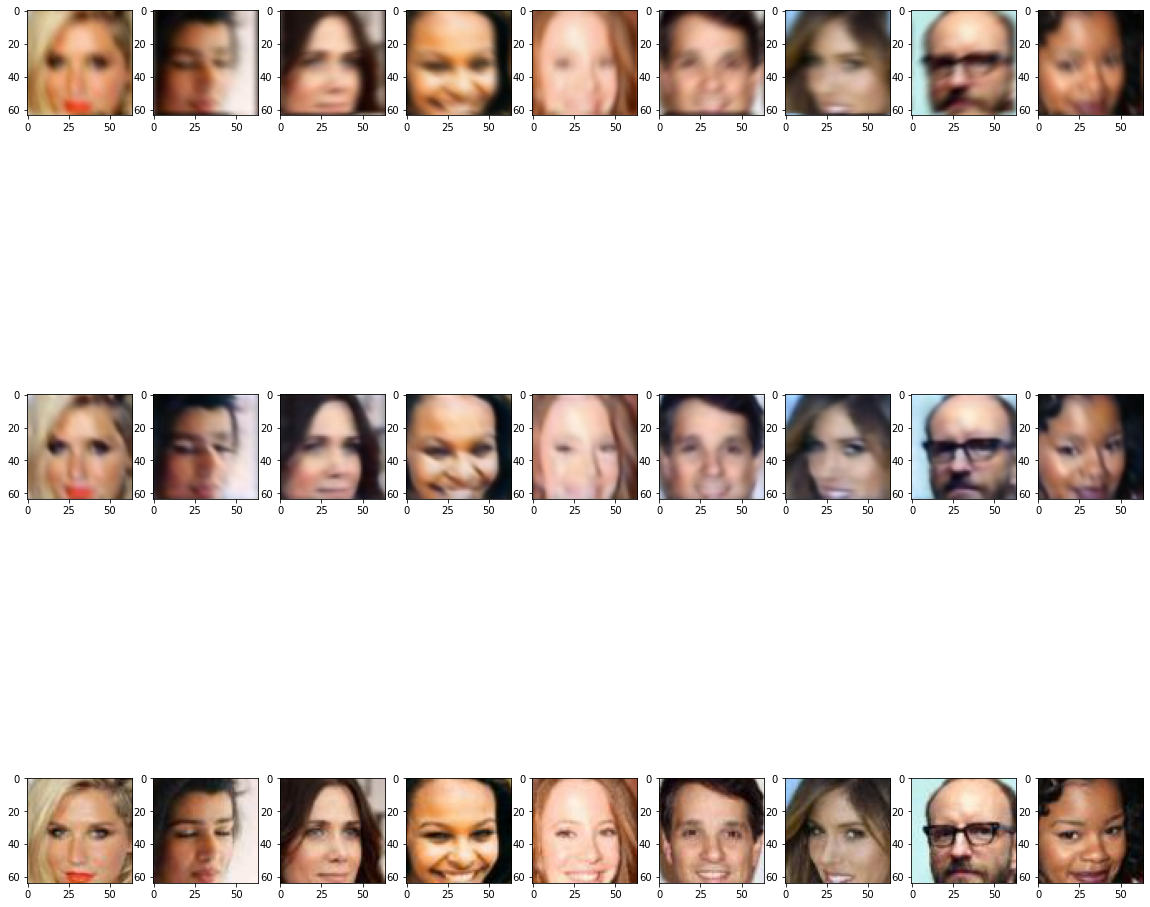

In [38]:
import numpy as np
import os

output_path = "/content/gdrive/My Drive/presentation/"
outputs = []
for i in range(9):
  img = cv2.imread(output_path+str(i)+".png")
  outputs.append(img)

train_images = []
for i in range(9):
  im = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/blur/00000"+str(i+1)+".png"),cv2.COLOR_BGR2RGB)           # visualize total results with ground truth
  train_images.append(im)

label_images = []
for i in range(9):
  imgs = cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/clean/00000"+str(i+1)+".png"),cv2.COLOR_BGR2RGB)
  label_images.append(imgs)

_,pos = plt.subplots(nrows=3, ncols=9, figsize=(20,20))
for i in range(len(outputs)):
  pos[0][i].imshow(train_images[i])
  pos[1][i].imshow(outputs[i])
  pos[2][i].imshow(label_images[i])
plt.show()

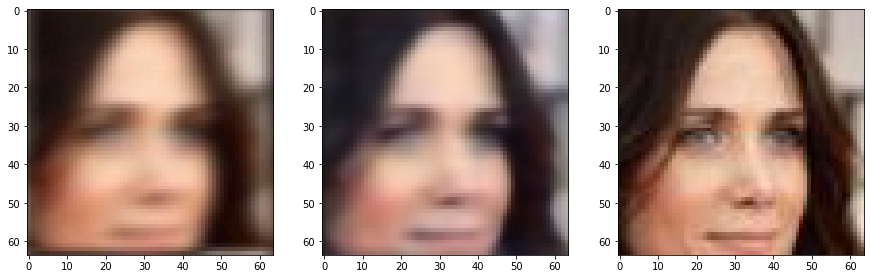

In [31]:
_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax[0].imshow(train_images[2])
ax[1].imshow(outputs[2])
ax[2].imshow(label_images[2])
plt.show()

In [43]:
import math

def PSNR(img1, img2):
    h, w, c = img1.shape
    PIXEL_MAX = 255.0
    mse = np.sum((img1-img2)**2)/(h*w*c)                        # evaluate performance by using PSNR
    print("MSE:",mse)
    if mse == 0:
        return 100
    else:
        return 10*math.log10(math.pow(PIXEL_MAX,2)/mse)
    
k = 6

original = label_images[k]     # clean image
contrast1 = outputs[k]         # model output
contrast2 = train_images[k]    # blur image

result1 = PSNR(original, contrast1)
result2 = PSNR(original, contrast2)
print("PSNR result between label & output :",result1)
print("PSNR result between label & train data :",result2)

MSE: 75.417724609375
MSE: 76.60693359375
PSNR result between label & output : 29.356069354832673
PSNR result between label & train data : 29.288122820286432
